In [21]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [1]:
import configparser
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
config = configparser.ConfigParser()
config.read('dwh.cfg')

conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(config.get('CLUSTER','HOST'),
                                                                              config.get('DWH','DWH_DB'),
                                                                              config.get('DWH','DWH_DB_USER'),
                                                                              config.get('DWH','DWH_DB_PASSWORD'),
                                                                              config.get('DWH','DWH_PORT')))
cur = conn.cursor()

In [24]:
#100 Most popular songs
query="""SELECT b.title, COUNT(a.song_id)
FROM songplay a
JOIN song b on b.song_id=a.song_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 100
"""
cur.execute(query)
df=cur.fetchall()
df=pd.DataFrame(df)
df.columns = ['Songs', 'Play_Count']

In [36]:
df.head(10)

,Songs,Play_Count
0,Intro,75
1,Home,52
2,You're The One,37
3,Smile,20
4,Secrets,17


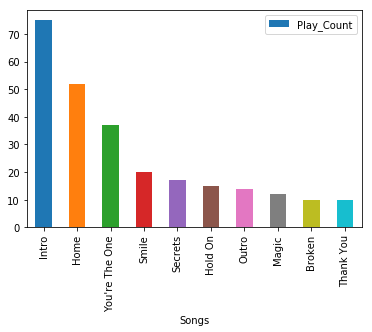

In [70]:
#Plot Top 10 Songs
df.head(10).plot(kind='bar', x='Songs',y='Play_Count')

In [3]:
#10 Most popular artists
q="""SELECT b.artist_name, COUNT(a.song_id)
FROM songplay a
JOIN artist b on b.artist_id=a.artist_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10"""

In [4]:
cur.execute(q)

In [5]:
t=cur.fetchall()
df=pd.DataFrame(t)
df.columns = ['Artist', 'Play_Count']

In [6]:
df.head(10)

,Artist,Play_Count
0,Dwight Yoakam,37
1,Carleen Anderson,17
2,Working For A Nuclear Free City,13
3,Frozen Plasma,13
4,Gemma Hayes,13
5,Eli Young Band,13
6,Kid Cudi,10
7,Kid Cudi / Kanye West / Common,10
8,Ron Carter,9
9,Lonnie Gordon,9


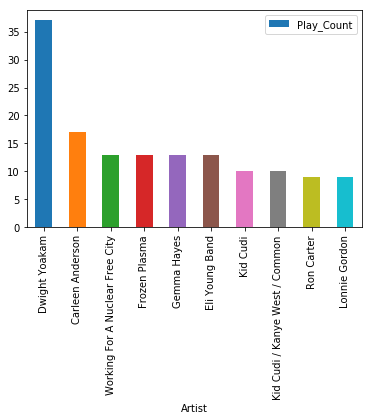

In [7]:
#Plot Top 10 Artists
df.plot(kind='bar', x='Artist',y='Play_Count')